Model Coefficient (Slope): [104.18947796]
Model Intercept (Y-intercept): 103572.93544586634


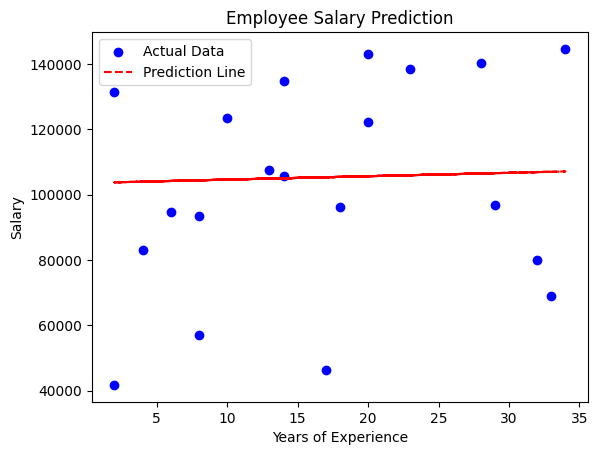

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Function to load data from CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)  # Read CSV file into a DataFrame
    return df

# Recursive function to train the model
def train_model_recursive(model, X_train, y_train, iterations):
    if iterations == 0:
        return model  # Base case: Stop recursion when iterations reach 0

    model.fit(X_train, y_train)  # Train the model
    return train_model_recursive(model, X_train, y_train, iterations - 1)  # Recursive call

# File path to CSV file
file_path = 'employee_data.csv' 
df = load_data(file_path)  # Load the data

# Splitting data into training and testing sets
X = df[['Experience']]  # Input feature: Years of Experience
y = df['Salary']  # Output target: Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model using recursion
model = LinearRegression()
trained_model = train_model_recursive(model, X_train, y_train, 3)  # Train model recursively

# Making predictions
y_pred = trained_model.predict(X_test)

# Displaying results
print("Model Coefficient (Slope):", trained_model.coef_)
print("Model Intercept (Y-intercept):", trained_model.intercept_)

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data')  # Scatter plot for actual data
plt.plot(X, trained_model.predict(X), color='red', linestyle='dashed', label='Prediction Line')  # Regression line
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Employee Salary Prediction')
plt.legend()
plt.show()
